In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in weather data
weather_df = pd.read_csv("data/sorted_temp_and_rain_dataset.csv")
weather_df

,tem,Month,Year,rain
0,16.976000,1,1901,18.535600
1,19.902600,2,1901,16.254800
2,24.315800,3,1901,70.798100
3,28.183400,4,1901,66.161600
4,27.889200,5,1901,267.215000
...,...,...,...,...
1469,28.586394,6,2023,299.915166
1470,28.533089,7,2023,353.399033
1471,28.451926,8,2023,421.058714
1472,27.737212,9,2023,306.090925


In [3]:
# basic info about dataset - 1
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1474 non-null   float64
 1   Month   1474 non-null   int64  
 2   Year    1474 non-null   int64  
 3   rain    1474 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 46.2 KB


In [4]:
# basic info about dataset - 2
weather_df.describe()

,tem,Month,Year,rain
count,1474.000000,1474.000000,1474.000000,1474.000000
mean,25.066443,6.493216,1961.917232,202.817120
std,3.701075,3.450595,35.470764,200.780134
min,15.925161,1.000000,1901.000000,0.000000
25%,22.121579,3.250000,1931.000000,19.382328
50%,27.012950,6.000000,1962.000000,146.412000
75%,28.032675,9.000000,1993.000000,347.571000
max,29.526000,12.000000,2023.000000,1012.020000


In [5]:
# rename columns for consistency and clarification of units
weather_df.rename(columns={"tem": "temp_c", "Month": "month_num", "Year": "year", "rain": "rain_mm"}, inplace=True)
weather_df

,temp_c,month_num,year,rain_mm
0,16.976000,1,1901,18.535600
1,19.902600,2,1901,16.254800
2,24.315800,3,1901,70.798100
3,28.183400,4,1901,66.161600
4,27.889200,5,1901,267.215000
...,...,...,...,...
1469,28.586394,6,2023,299.915166
1470,28.533089,7,2023,353.399033
1471,28.451926,8,2023,421.058714
1472,27.737212,9,2023,306.090925


In [6]:
# replace adding column with month names for readability
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
weather_df["month_name"] = weather_df["month_num"].apply(lambda x : str(months[x-1]))
weather_df

,temp_c,month_num,year,rain_mm,month_name
0,16.976000,1,1901,18.535600,January
1,19.902600,2,1901,16.254800,February
2,24.315800,3,1901,70.798100,March
3,28.183400,4,1901,66.161600,April
4,27.889200,5,1901,267.215000,May
...,...,...,...,...,...
1469,28.586394,6,2023,299.915166,June
1470,28.533089,7,2023,353.399033,July
1471,28.451926,8,2023,421.058714,August
1472,27.737212,9,2023,306.090925,September


In [7]:
# confirming updates
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_c      1474 non-null   float64
 1   month_num   1474 non-null   int64  
 2   year        1474 non-null   int64  
 3   rain_mm     1474 non-null   float64
 4   month_name  1474 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 57.7+ KB


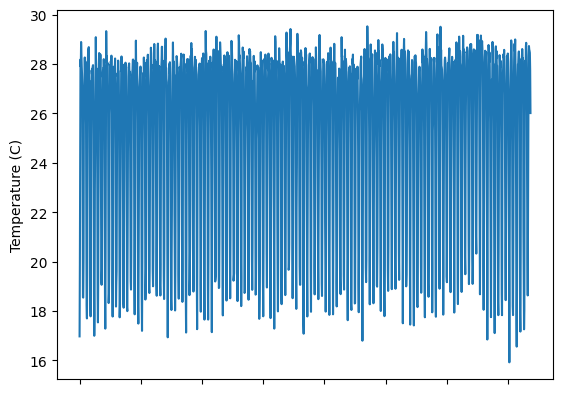

In [8]:
# visualization of temperature over time
temp_all = sns.lineplot(data=weather_df, x=weather_df.index, y="temp_c")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("")
plt.ylabel("Temperature (C)")
temp_all.set(xticklabels=[])
plt.show(temp_all)

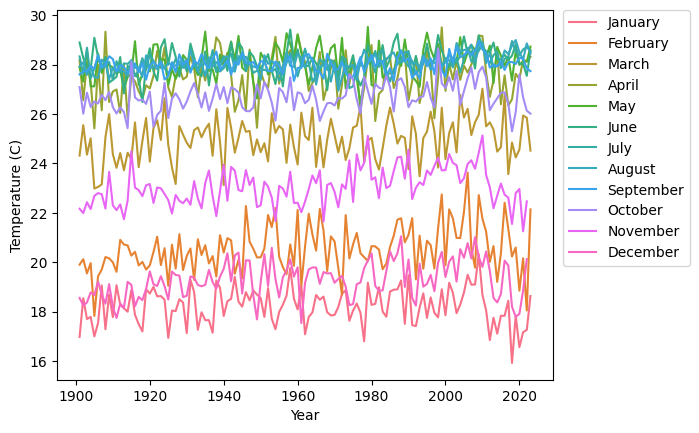

In [9]:
# visualization of monthly temperatures over time
temp_month = sns.lineplot(data=weather_df, x="year", y="temp_c", hue="month_name", style="month_name", dashes = False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Year")
plt.ylabel("Temperature (C)")
plt.show(temp_month)

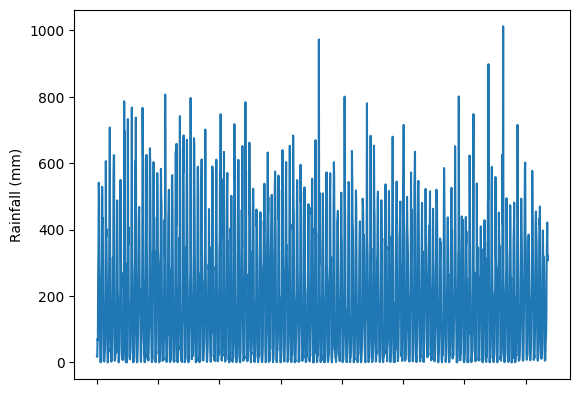

In [10]:
# visualization of rainfall over time
rain_all = sns.lineplot(data=weather_df, x=weather_df.index, y="rain_mm")
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("")
plt.ylabel("Rainfall (mm)")
rain_all.set(xticklabels=[])
plt.show(rain_all)

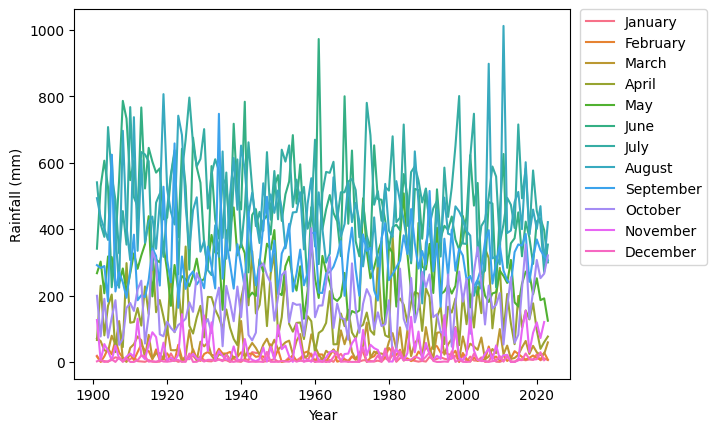

In [11]:
# visualization of monthly rainfall over time
rain_months = sns.lineplot(data=weather_df, x="year", y="rain_mm", hue="month_name", style="month_name", dashes = False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.show(rain_months)

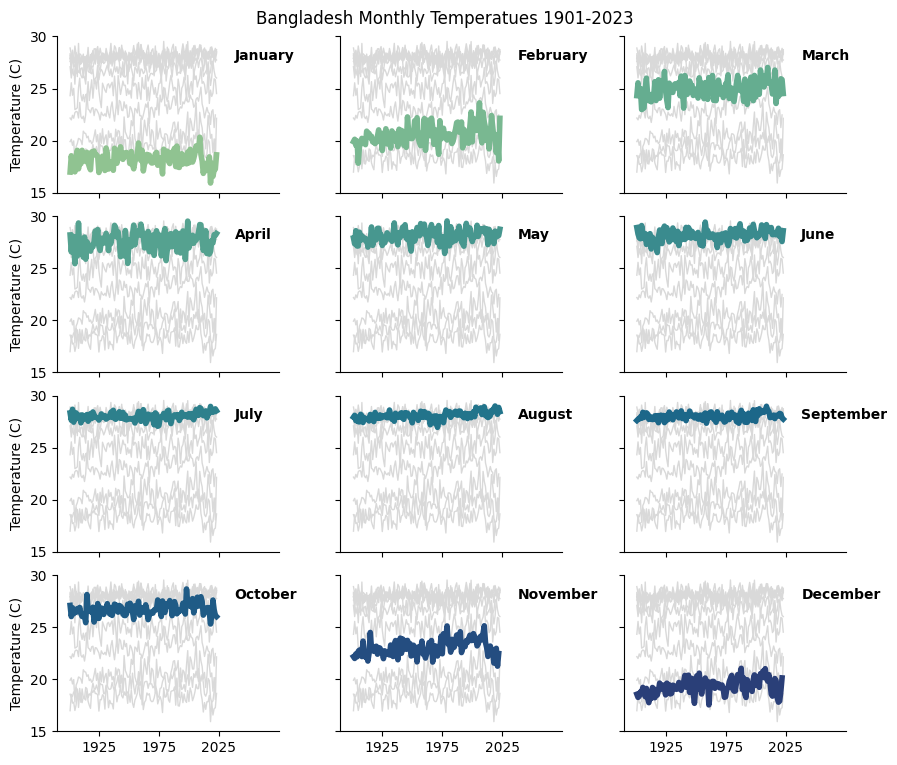

In [12]:
# plots broken out by month; modified from code at https://seaborn.pydata.org/examples/timeseries_facets.html
month_temps = sns.relplot(
    data=weather_df,
    x="year", y="temp_c", col="month_name", hue="month_name",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

for month, ax in month_temps.axes_dict.items():
    ax.text(.8, .85, month, transform=ax.transAxes, fontweight="bold")
    sns.lineplot(
        data=weather_df, x="year", y="temp_c", units="month_name",
        estimator=None, color=".85", linewidth=1, ax=ax,
    )

ax.set_xticks(ax.get_xticks()[::2])

month_temps.set_titles("")
month_temps.set_axis_labels("", "Temperature (C)")
month_temps.tight_layout(rect=[0, 0.03, 1, 0.97])
ax.set_xlim(1890, 2075)
ax.set_ylim(15, 30)
plt.suptitle("Bangladesh Monthly Temperatues 1901-2023")
month_temps

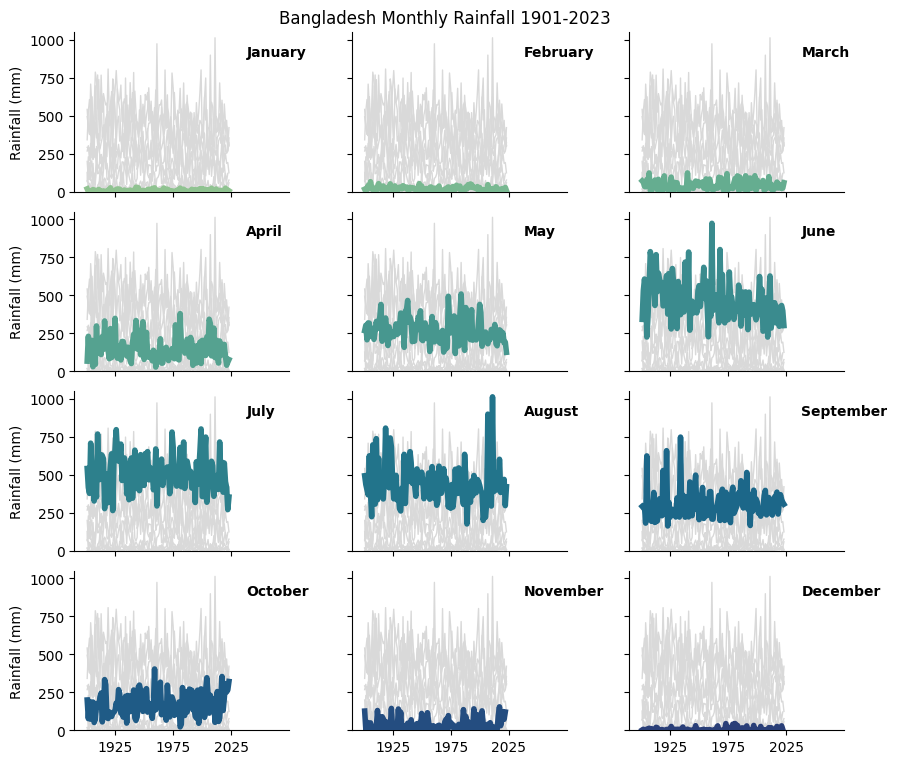

In [13]:
# plots broken out by month; modified from code at https://seaborn.pydata.org/examples/timeseries_facets.html
month_rain = sns.relplot(
    data=weather_df,
    x="year", y="rain_mm", col="month_name", hue="month_name",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

for month, ax in month_rain.axes_dict.items():
    ax.text(.8, .85, month, transform=ax.transAxes, fontweight="bold")
    sns.lineplot(
        data=weather_df, x="year", y="rain_mm", units="month_name",
        estimator=None, color=".85", linewidth=1, ax=ax,
    )

ax.set_xticks(ax.get_xticks()[::2])

month_rain.set_titles("")
month_rain.set_axis_labels("", "Rainfall (mm)")
month_rain.tight_layout(rect=[0, 0.03, 1, 0.97])
ax.set_xlim(1890, 2075)
ax.set_ylim(0, 1050)
plt.suptitle("Bangladesh Monthly Rainfall 1901-2023")
month_rain